In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from Clean import *

In [2]:
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

In [3]:
PATH = "../../Datasets/"

In [4]:
df = pd.read_csv(PATH + "Complete.csv")
df["Time"] = pd.to_datetime(df["Time"])

In [5]:
df.head()

,Time,O3_flag,SO2_flag,NO2_flag,NO_flag,CO_flag,PM10_flag,PM2.5_flag,WDir_Avg,Rain_Tot,WDir_SD,O3,SO2,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,Press_Avg,Rad_Avg,City
0,2015-08-01,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morelia
1,2015-08-02,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morelia
2,2015-08-03,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morelia
3,2015-08-04,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morelia
4,2015-08-05,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morelia


In [6]:
df["City"].unique()

array(['Morelia', 'Juriquilla', 'Merida', 'Hermosillo', 'Saltillo'],
      dtype=object)

In [7]:
df["Temp_Avg"].describe()

count    16312.000000
mean        21.368432
std          5.809115
min         -5.289665
25%         17.455012
50%         20.414795
75%         25.799670
max         43.740722
Name: Temp_Avg, dtype: float64

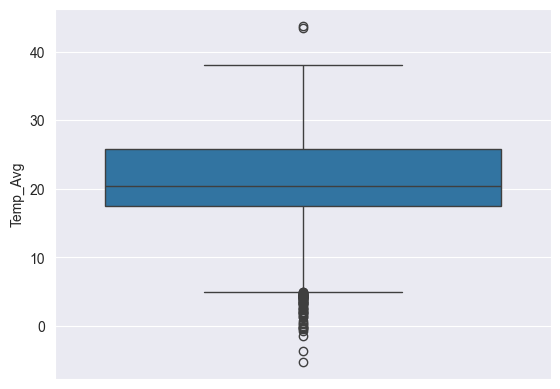

In [8]:
sns.boxplot(df["Temp_Avg"]);

In [9]:
df["Temp_Avg"] = df["Temp_Avg"].apply(temperature)

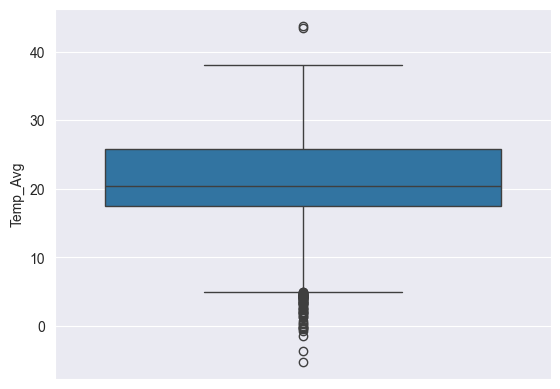

In [10]:
sns.boxplot(df["Temp_Avg"]);

In [11]:
df["Rad_Avg"] = df["Rad_Avg"].apply(radiation)

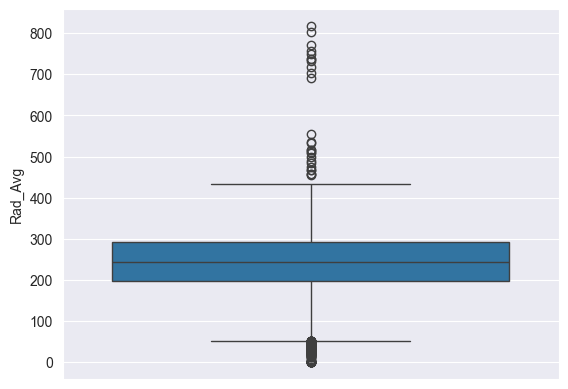

In [12]:
sns.boxplot(df["Rad_Avg"]);

In [13]:
morelia = df[df["City"] == "Morelia"]
juriquilla = df[df["City"] == "Juriquilla"]
merida = df[df["City"] == "Merida"]
hermosillo = df[df["City"] == "Hermosillo"]
saltillo = df[df["City"] == "Saltillo"]

In [14]:
morelia = morelia.sort_values(by="Time")
juriquilla = juriquilla = juriquilla.sort_values(by="Time")
merida = merida.sort_values(by="Time")
hermosillo = hermosillo.sort_values(by="Time")
saltillo = saltillo.sort_values(by="Time")

In [15]:
color ={
    "morelia":"darkorchid",
    "juriquilla":"dodgerblue",
    "merida":"red",
    "hermosillo":"forestgreen",
    "saltillo":"peru"        
}

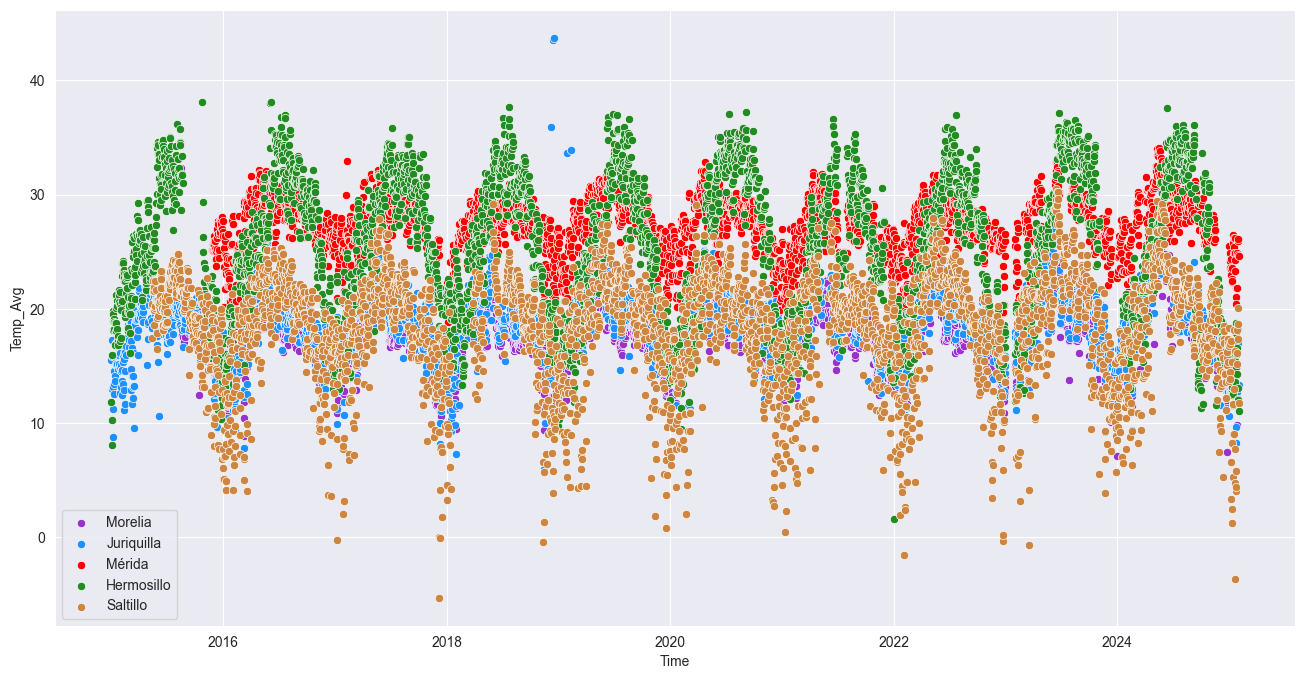

In [16]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=morelia["Time"], y=morelia["Temp_Avg"], color=color["morelia"], label="Morelia")
sns.scatterplot(x=juriquilla["Time"], y=juriquilla["Temp_Avg"], color=color["juriquilla"], label="Juriquilla")
sns.scatterplot(x=merida["Time"], y=merida["Temp_Avg"], color=color["merida"], label="Mérida")
sns.scatterplot(x=hermosillo["Time"], y=hermosillo["Temp_Avg"], color=color["hermosillo"], label="Hermosillo")
sns.scatterplot(x=saltillo["Time"], y=saltillo["Temp_Avg"], color=color["saltillo"], label="Saltillo")
plt.legend()

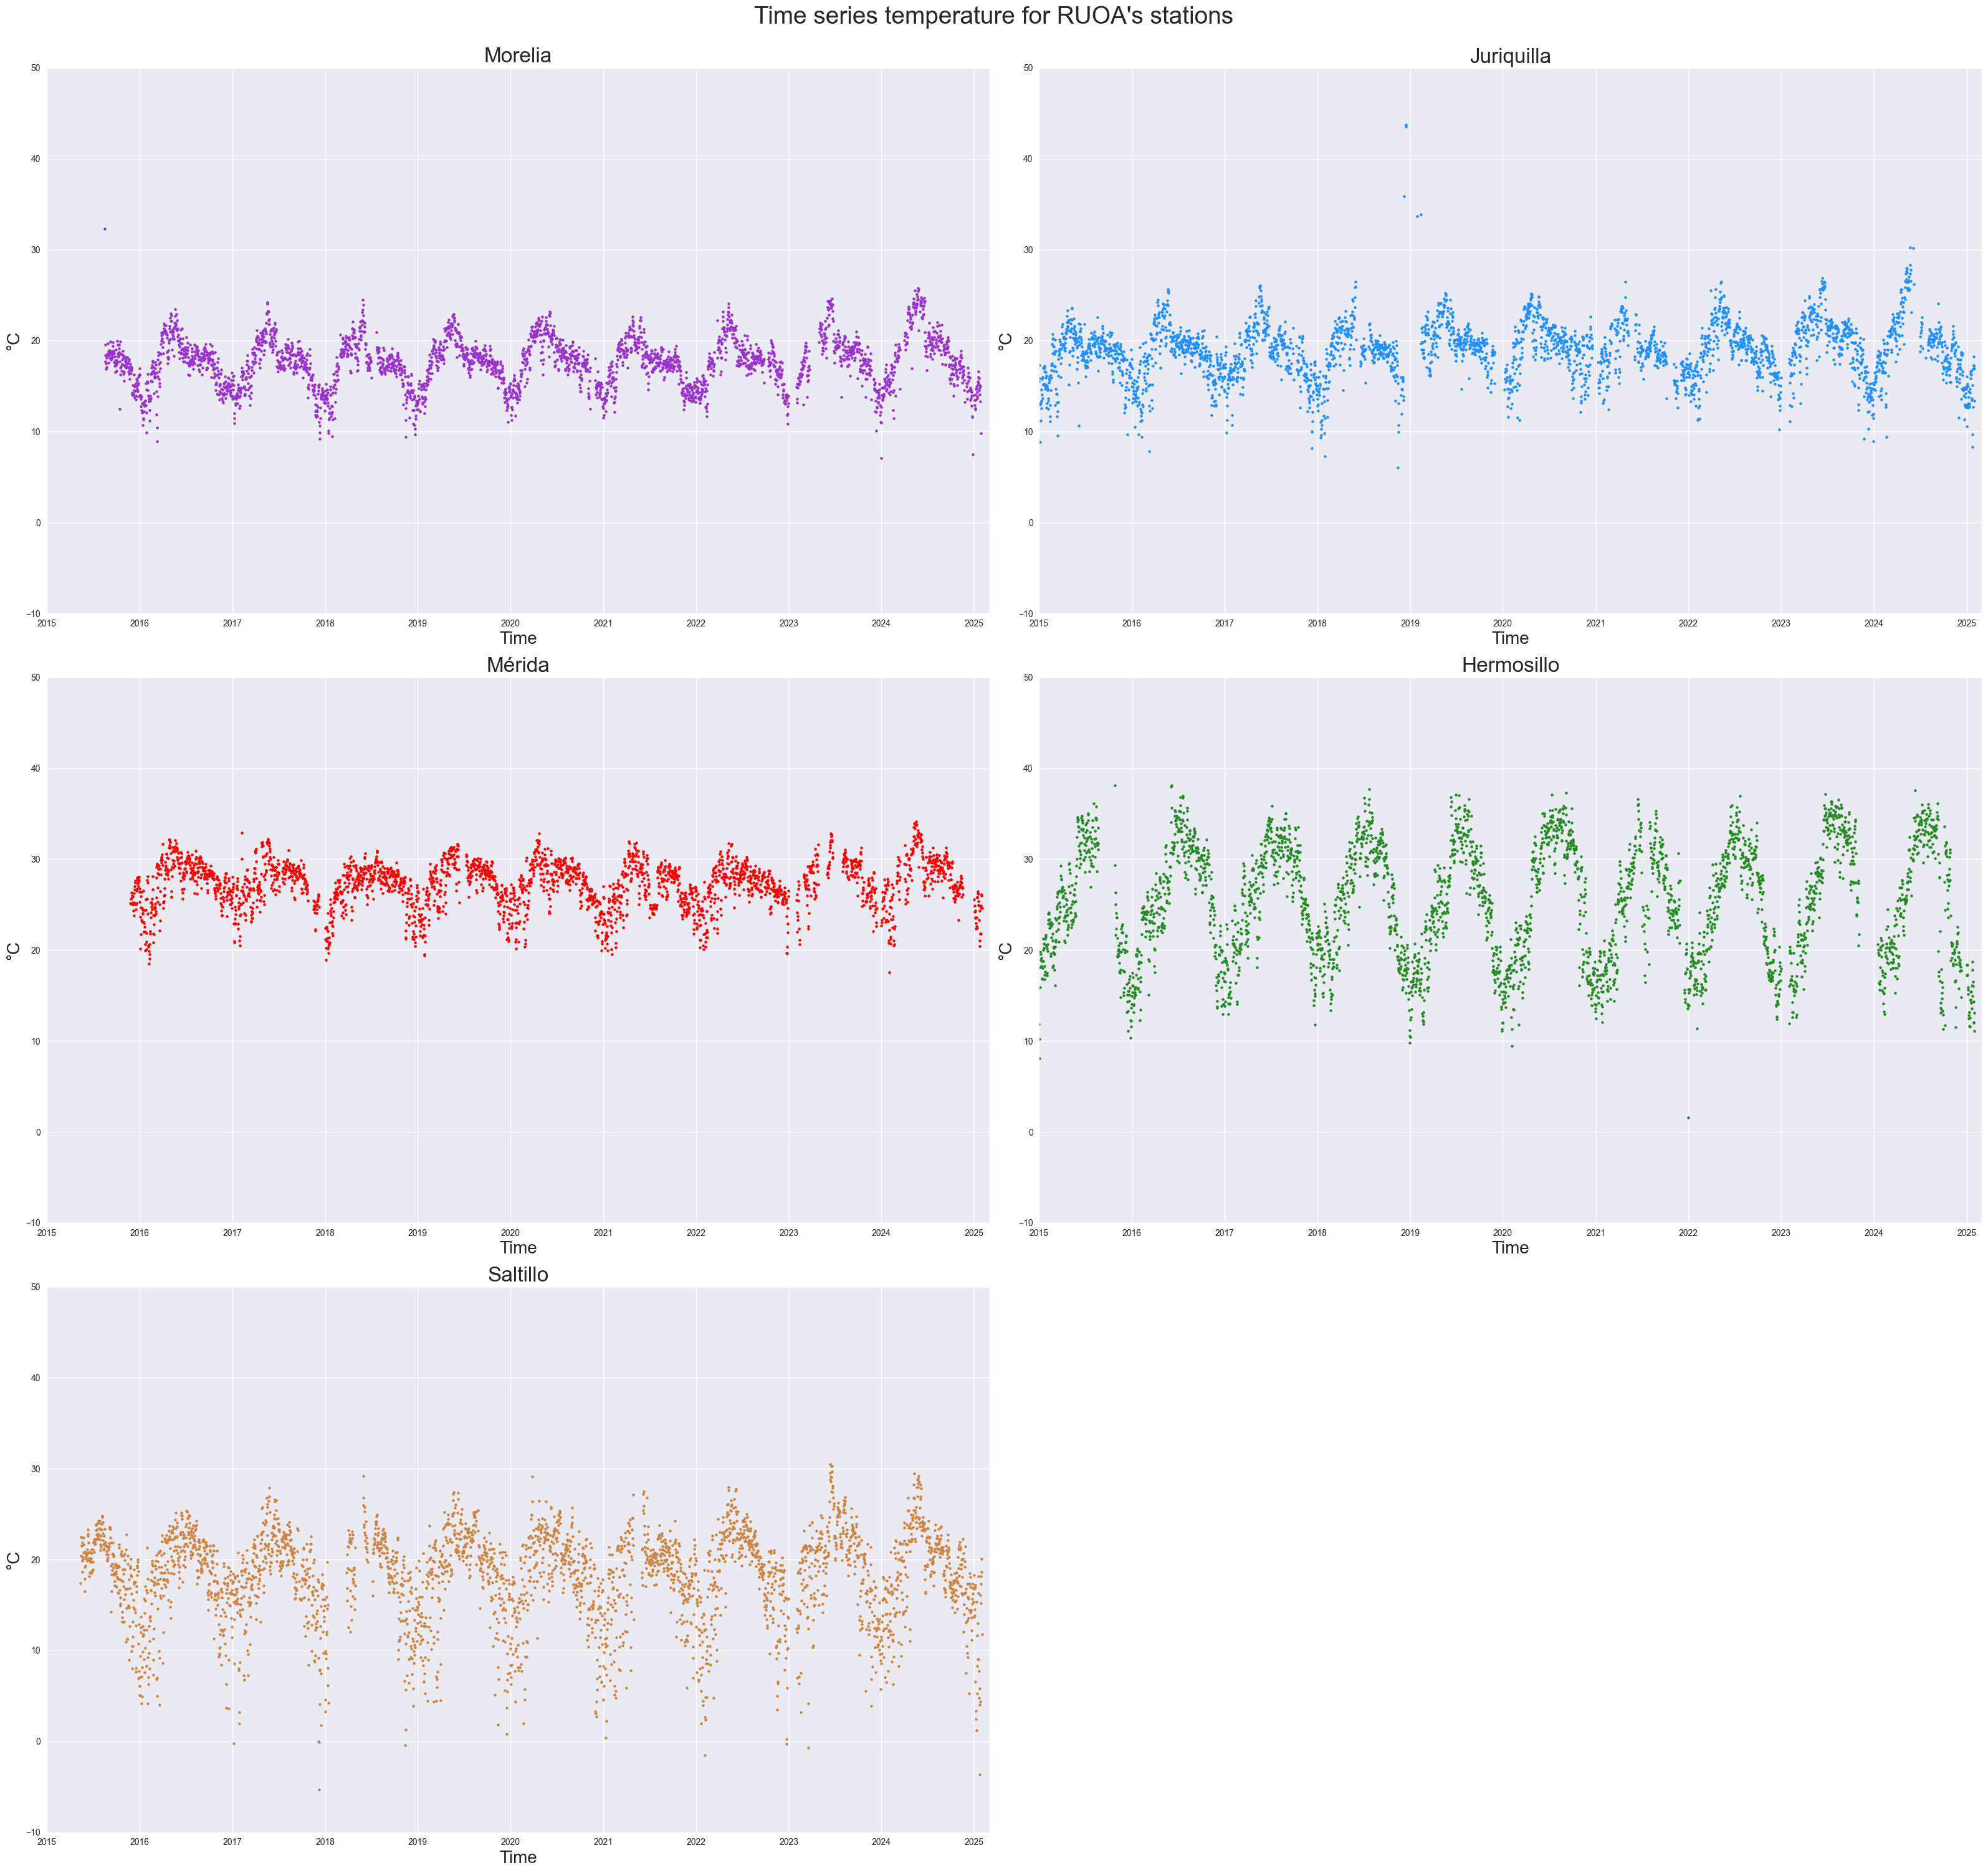

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(32, 30))

fig.suptitle("Time series temperature for RUOA's stations", y=1, size=28)
fig.delaxes(ax[2][1])

start_date = pd.to_datetime("2015-01-01")
end_date = pd.to_datetime("2025-03-01")

ax[0][0].scatter(x=morelia["Time"], y=morelia["Temp_Avg"], color=color["morelia"], label="Morelia", s=5)
ax[0][0].set_ylim(-10, 50)
ax[0][0].set_xlim(start_date, end_date)
ax[0][0].set_title("Morelia", size=24)
ax[0][0].set_ylabel("°C", size=20)
ax[0][0].set_xlabel("Time", size=20)

ax[0][1].scatter(x=juriquilla["Time"], y=juriquilla["Temp_Avg"], color=color["juriquilla"], label="Juriquilla", s=5)
ax[0][1].set_ylim(-10, 50)
ax[0][1].set_xlim(start_date, end_date)
ax[0][1].set_title("Juriquilla", size=24)
ax[0][1].set_ylabel("°C", size=20)
ax[0][1].set_xlabel("Time", size=20)

ax[1][0].scatter(x=merida["Time"], y=merida["Temp_Avg"], color=color["merida"], label="Mérida", s=5)
ax[1][0].set_ylim(-10, 50)
ax[1][0].set_xlim(start_date, end_date)
ax[1][0].set_title("Mérida", size=24)
ax[1][0].set_ylabel("°C", size=20)
ax[1][0].set_xlabel("Time", size=20)

ax[1][1].scatter(x=hermosillo["Time"], y=hermosillo["Temp_Avg"], color=color["hermosillo"], label="Hermosillo", s=5)
ax[1][1].set_ylim(-10, 50)
ax[1][1].set_xlim(start_date, end_date)
ax[1][1].set_title("Hermosillo", size=24)
ax[1][1].set_ylabel("°C", size=20)
ax[1][1].set_xlabel("Time", size=20)

ax[2][0].scatter(x=saltillo["Time"], y=saltillo["Temp_Avg"], color=color["saltillo"], label="Saltillo", s=5)
ax[2][0].set_ylim(-10, 50)
ax[2][0].set_xlim(start_date, end_date)
ax[2][0].set_title("Saltillo", size=24)
ax[2][0].set_ylabel("°C", size=20)
ax[2][0].set_xlabel("Time", size=20)

plt.tight_layout()
plt.show()

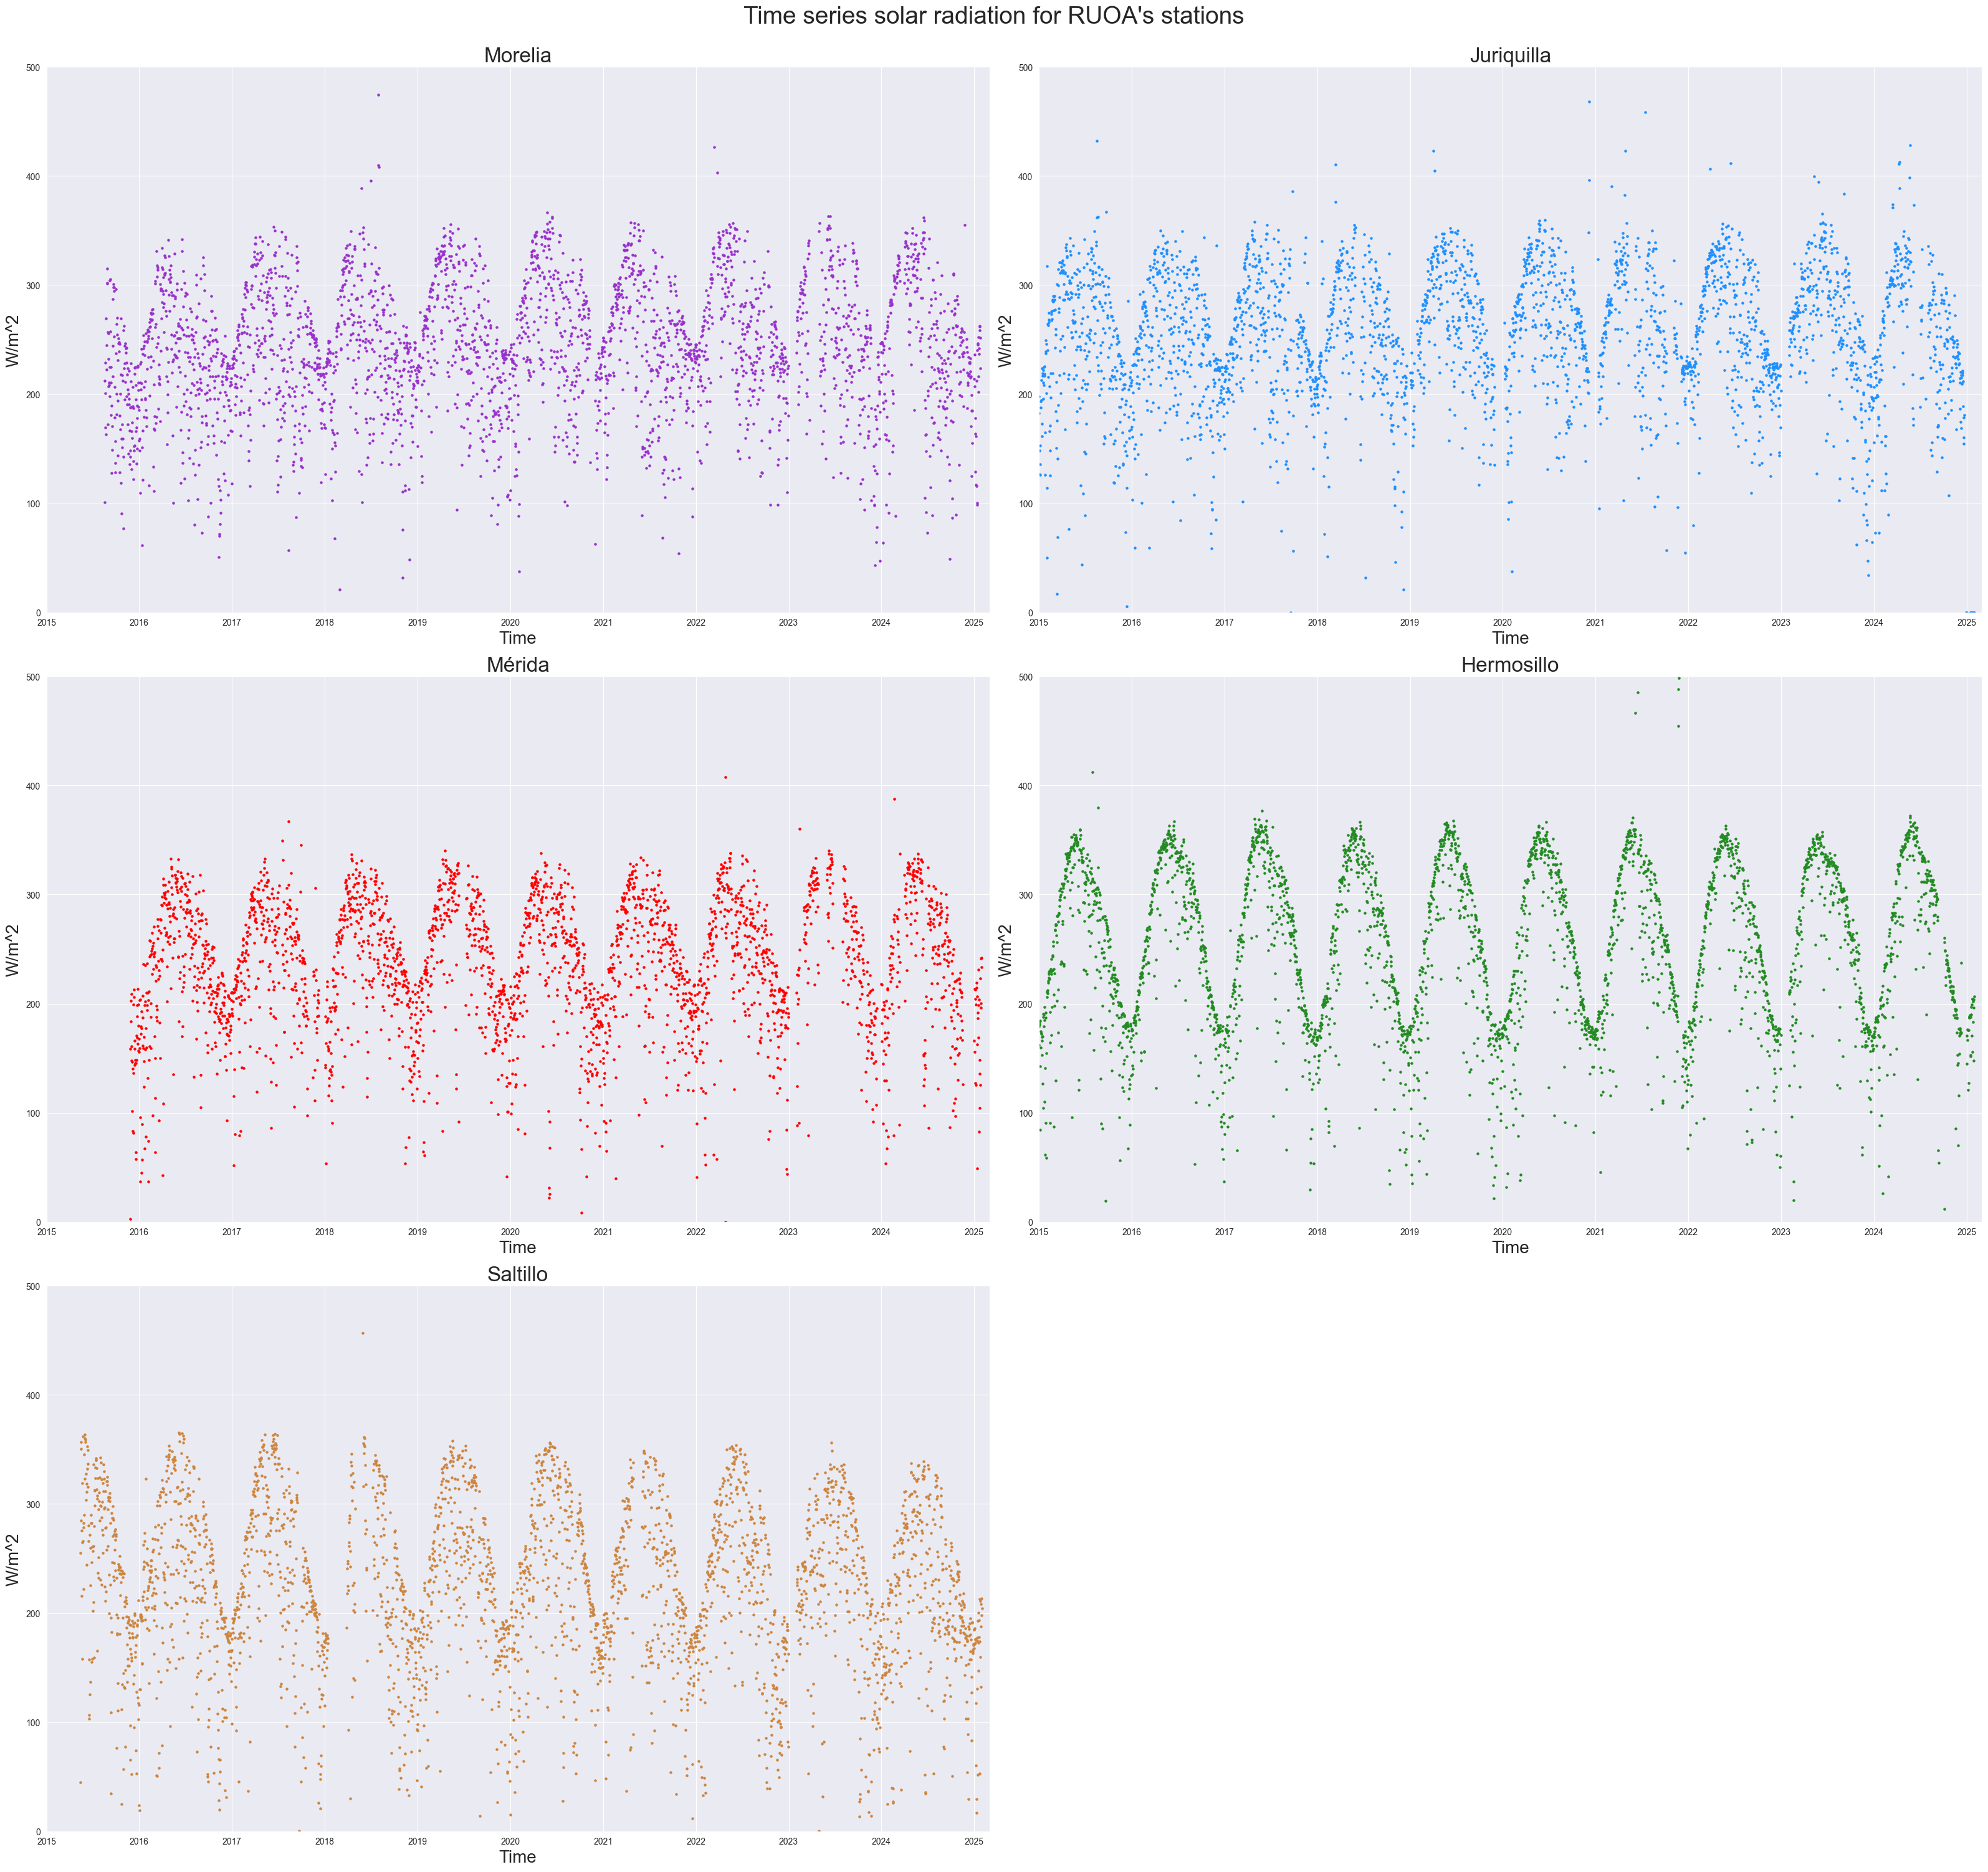

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(32, 30))

fig.suptitle("Time series solar radiation for RUOA's stations", y=1, size=28)
fig.delaxes(ax[2][1])

start_date = pd.to_datetime("2015-01-01")
end_date = pd.to_datetime("2025-03-01")

ax[0][0].scatter(x=morelia["Time"], y=morelia["Rad_Avg"], color=color["morelia"], label="Morelia", s=5)
ax[0][0].set_ylim(0, 500)
ax[0][0].set_xlim(start_date, end_date)
ax[0][0].set_title("Morelia", size=24)
ax[0][0].set_ylabel("W/m^2", size=20)
ax[0][0].set_xlabel("Time", size=20)

ax[0][1].scatter(x=juriquilla["Time"], y=juriquilla["Rad_Avg"], color=color["juriquilla"], label="Juriquilla", s=5)
ax[0][1].set_ylim(0, 500)
ax[0][1].set_xlim(start_date, end_date)
ax[0][1].set_title("Juriquilla", size=24)
ax[0][1].set_ylabel("W/m^2", size=20)
ax[0][1].set_xlabel("Time", size=20)

ax[1][0].scatter(x=merida["Time"], y=merida["Rad_Avg"], color=color["merida"], label="Mérida", s=5)
ax[1][0].set_ylim(0, 500)
ax[1][0].set_xlim(start_date, end_date)
ax[1][0].set_title("Mérida", size=24)
ax[1][0].set_ylabel("W/m^2", size=20)
ax[1][0].set_xlabel("Time", size=20)

ax[1][1].scatter(x=hermosillo["Time"], y=hermosillo["Rad_Avg"], color=color["hermosillo"], label="Hermosillo", s=5)
ax[1][1].set_ylim(0, 500)
ax[1][1].set_xlim(start_date, end_date)
ax[1][1].set_title("Hermosillo", size=24)
ax[1][1].set_ylabel("W/m^2", size=20)
ax[1][1].set_xlabel("Time", size=20)

ax[2][0].scatter(x=saltillo["Time"], y=saltillo["Rad_Avg"], color=color["saltillo"], label="Saltillo", s=5)
ax[2][0].set_ylim(0, 500)
ax[2][0].set_xlim(start_date, end_date)
ax[2][0].set_title("Saltillo", size=24)
ax[2][0].set_ylabel("W/m^2", size=20)
ax[2][0].set_xlabel("Time", size=20)

plt.tight_layout()
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [20]:
morelia["TimeOrdinal"] = morelia["Time"].map(datetime.toordinal)
juriquilla["TimeOrdinal"] = juriquilla["Time"].map(datetime.toordinal)
merida["TimeOrdinal"] = merida["Time"].map(datetime.toordinal)
hermosillo["TimeOrdinal"] = hermosillo["Time"].map(datetime.toordinal)
saltillo["TimeOrdinal"] = saltillo["Time"].map(datetime.toordinal)


In [21]:
X_morelia = morelia["TimeOrdinal"].values
Y_morelia = morelia["Temp_Avg"].values

maskMorelia = ~np.isnan(Y_morelia)
X_morelia = X_morelia[maskMorelia]
Y_morelia = Y_morelia[maskMorelia]

modelMorelia = LinearRegression()
modelMorelia.fit(X_morelia.reshape(-1,1), Y_morelia.reshape(-1,1))

Y_pred_morelia = modelMorelia.predict(X_morelia.reshape(-1,1))

In [22]:
X_juriquilla = juriquilla["TimeOrdinal"].values
Y_juriquilla = juriquilla["Temp_Avg"].values

maskJuriquilla = ~np.isnan(Y_juriquilla)
X_juriquilla = X_juriquilla[maskJuriquilla]
Y_juriquilla = Y_juriquilla[maskJuriquilla]

modeljuriquilla = LinearRegression()
modeljuriquilla.fit(X_juriquilla.reshape(-1,1), Y_juriquilla.reshape(-1,1))

Y_pred_juriquilla = modeljuriquilla.predict(X_juriquilla.reshape(-1,1))

In [23]:
X_merida = merida["TimeOrdinal"].values
Y_merida = merida["Temp_Avg"].values

maskMerida = ~np.isnan(Y_merida)
X_merida = X_merida[maskMerida]
Y_merida = Y_merida[maskMerida]

modelmerida = LinearRegression()
modelmerida.fit(X_merida.reshape(-1,1), Y_merida.reshape(-1,1))

Y_pred_merida = modelmerida.predict(X_merida.reshape(-1,1))

In [24]:
X_hermosillo = hermosillo["TimeOrdinal"].values
Y_hermosillo = hermosillo["Temp_Avg"].values

maskHermosillo = ~np.isnan(Y_hermosillo)
X_hermosillo = X_hermosillo[maskHermosillo]
Y_hermosillo = Y_hermosillo[maskHermosillo]

modelhermosillo = LinearRegression()
modelhermosillo.fit(X_hermosillo.reshape(-1,1), Y_hermosillo.reshape(-1,1))

Y_pred_hermosillo = modelhermosillo.predict(X_hermosillo.reshape(-1,1))

In [25]:
X_saltillo = saltillo["TimeOrdinal"].values
Y_saltillo = saltillo["Temp_Avg"].values

maskSaltillo = ~np.isnan(Y_saltillo)
X_saltillo = X_saltillo[maskSaltillo]
Y_saltillo = Y_saltillo[maskSaltillo]

modelsaltillo = LinearRegression()
modelsaltillo.fit(X_saltillo.reshape(-1,1), Y_saltillo.reshape(-1,1))

Y_pred_saltillo = modelsaltillo.predict(X_saltillo.reshape(-1,1))

In [26]:
color_regresion = {
    "morelia":"hotpink",
    "juriquilla":"cyan",
    "merida":"crimson",
    "hermosillo":"springgreen",
    "saltillo":"orange"
}

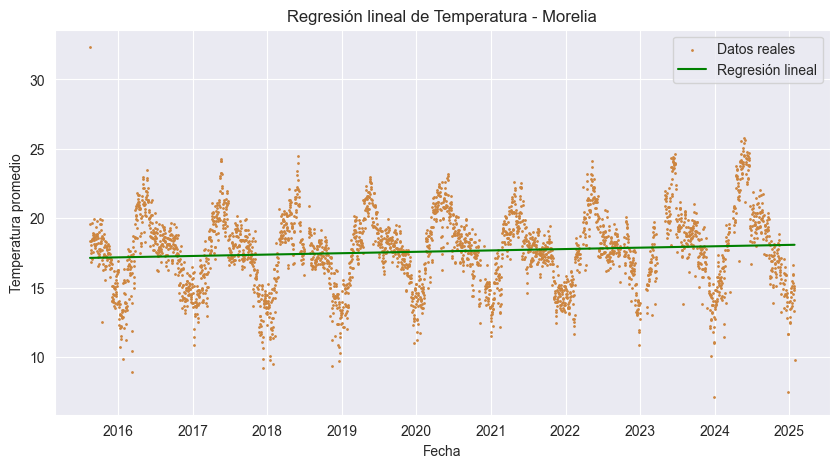

In [27]:
plt.figure(figsize=(10, 5))
plt.scatter(morelia["Time"][maskMorelia], Y_morelia, s=1, color="peru", label="Datos reales")
plt.plot(morelia["Time"][maskMorelia], Y_pred_morelia, color="green", label="Regresión lineal")
plt.title("Regresión lineal de Temperatura - Morelia")
plt.xlabel("Fecha")
plt.ylabel("Temperatura promedio")
plt.legend()
plt.grid(True)
plt.show()

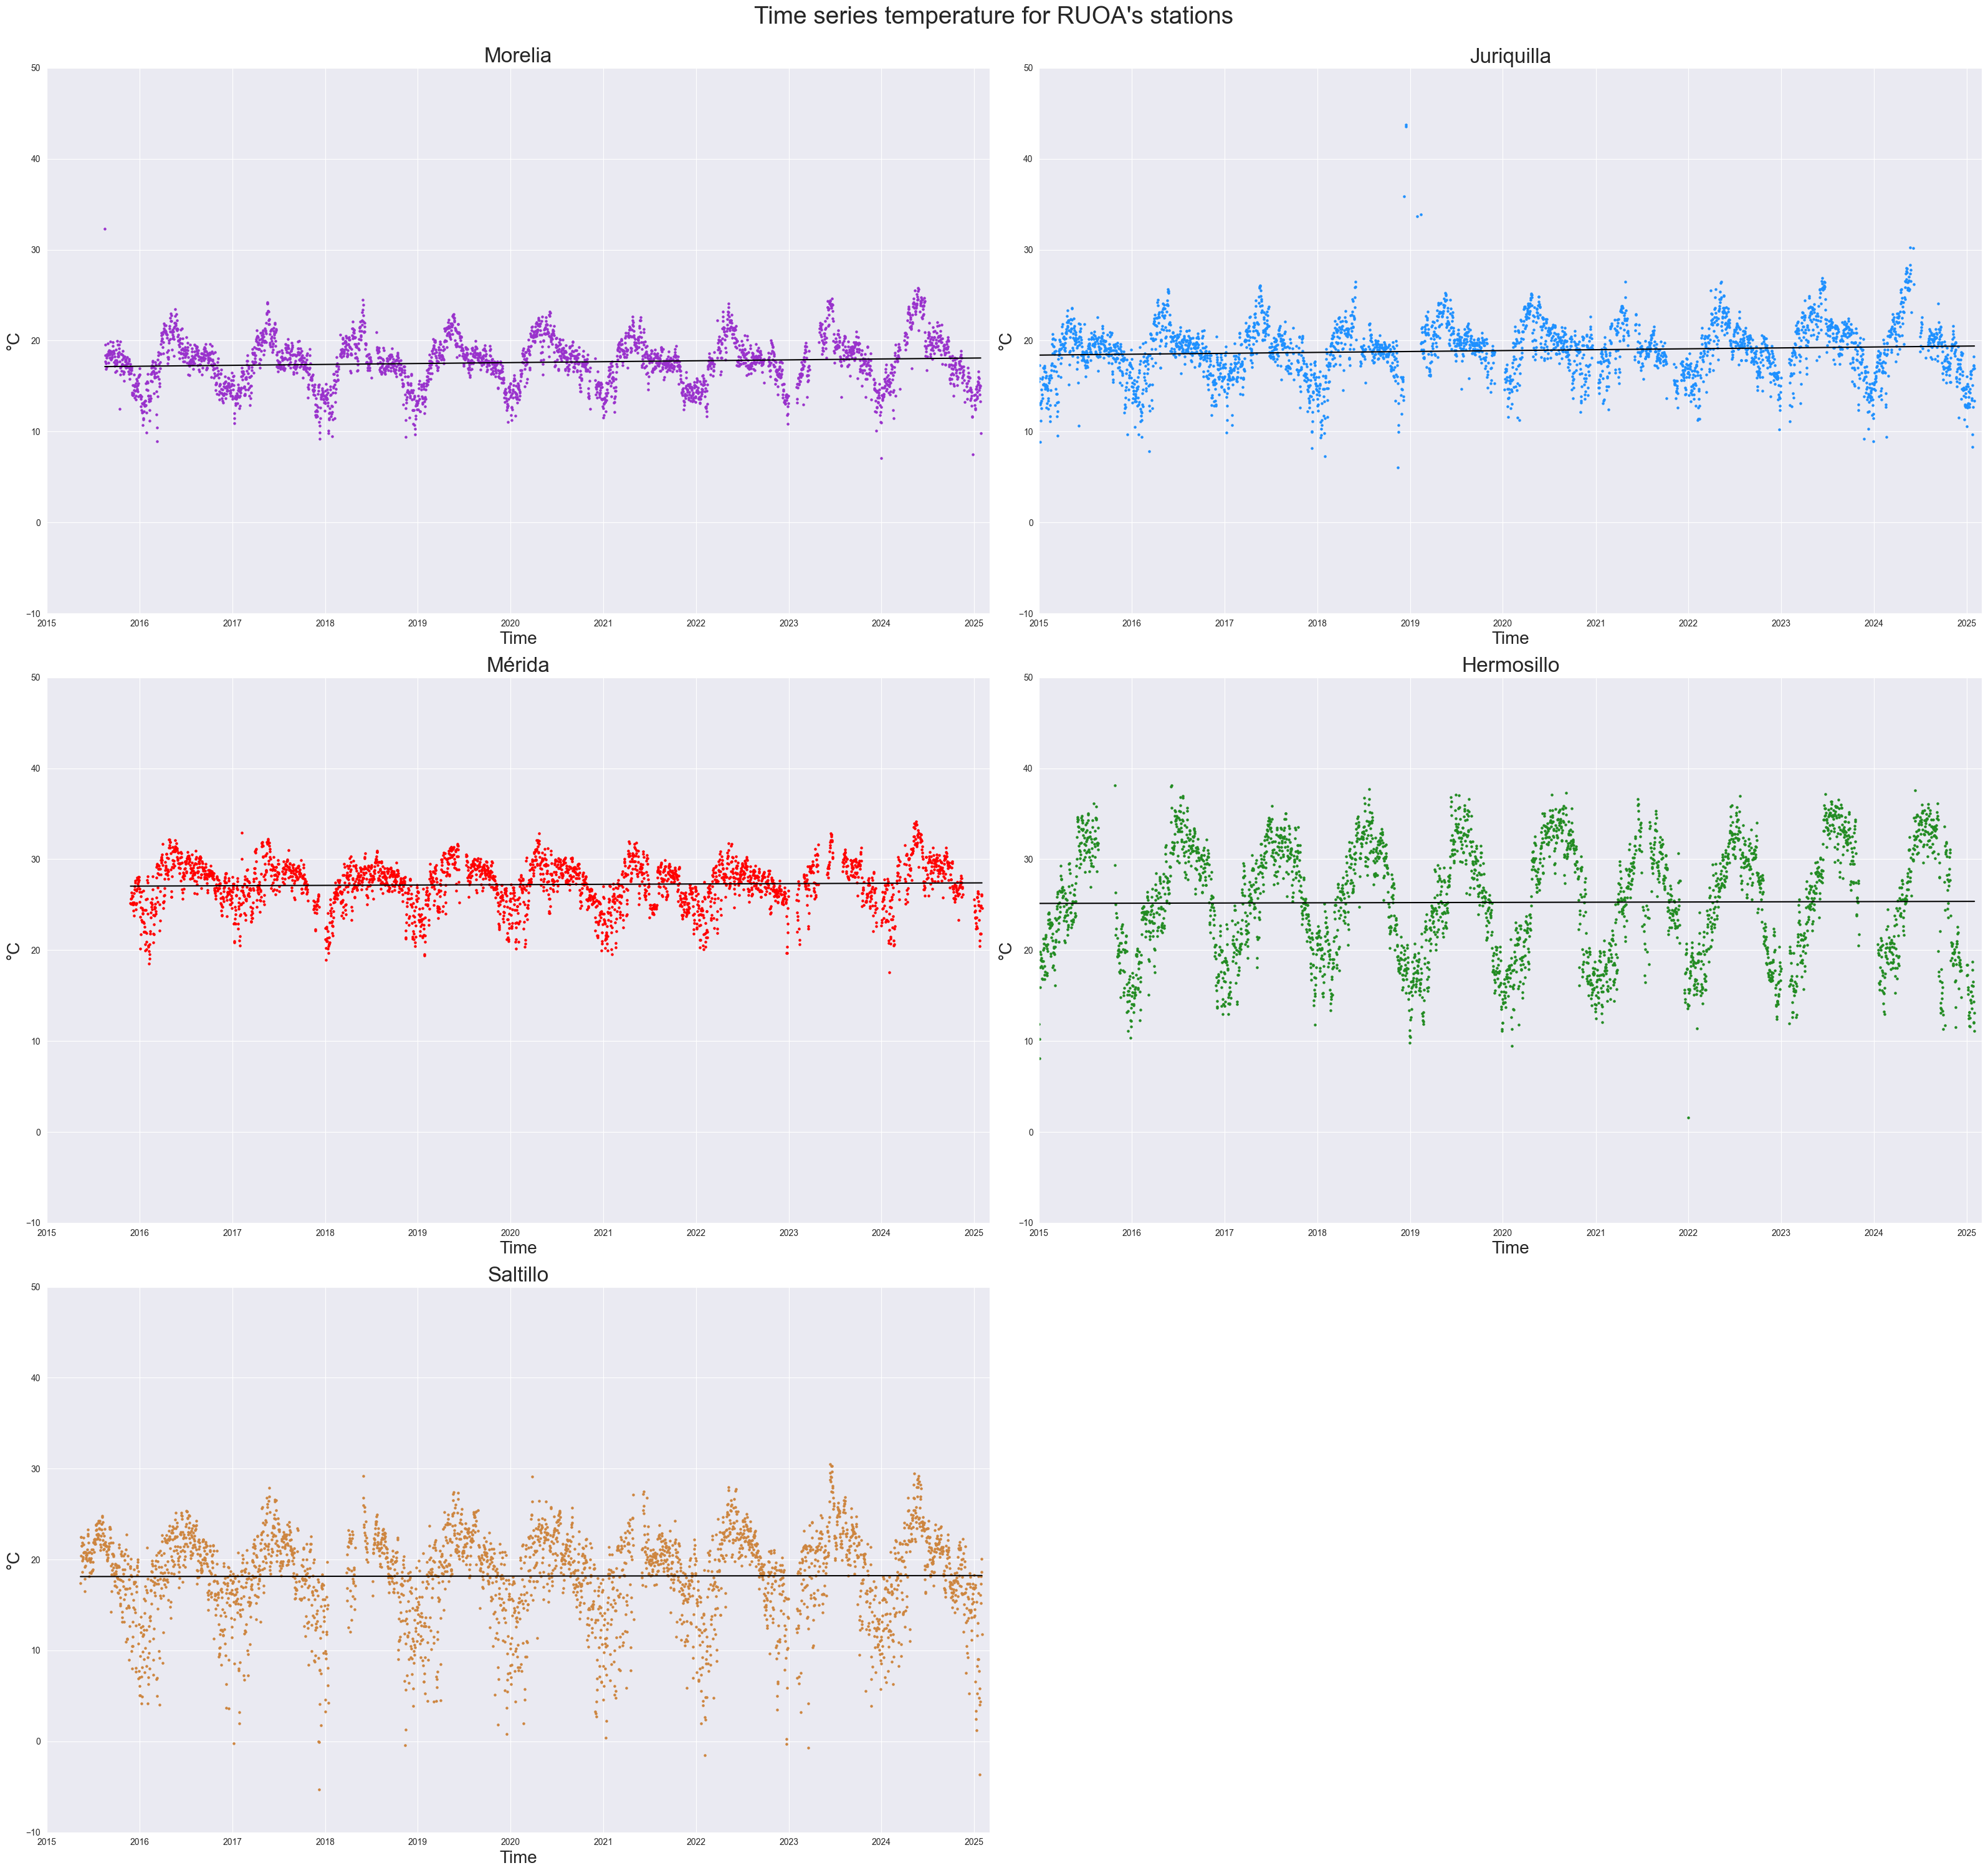

In [28]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(32, 30))

fig.suptitle("Time series temperature for RUOA's stations", y=1, size=28)
fig.delaxes(ax[2][1])

start_date = pd.to_datetime("2015-01-01")
end_date = pd.to_datetime("2025-03-01")

ax[0][0].scatter(x=morelia["Time"], y=morelia["Temp_Avg"], color=color["morelia"], label="Morelia", s=5)
ax[0][0].plot(morelia["Time"][maskMorelia], Y_pred_morelia, color="black")
ax[0][0].set_ylim(-10, 50)
ax[0][0].set_xlim(start_date, end_date)
ax[0][0].set_title("Morelia", size=24)
ax[0][0].set_ylabel("°C", size=20)
ax[0][0].set_xlabel("Time", size=20)

ax[0][1].scatter(x=juriquilla["Time"], y=juriquilla["Temp_Avg"], color=color["juriquilla"], label="Juriquilla", s=5)
ax[0][1].plot(juriquilla["Time"][maskJuriquilla], Y_pred_juriquilla, color="black")
ax[0][1].set_ylim(-10, 50)
ax[0][1].set_xlim(start_date, end_date)
ax[0][1].set_title("Juriquilla", size=24)
ax[0][1].set_ylabel("°C", size=20)
ax[0][1].set_xlabel("Time", size=20)

ax[1][0].scatter(x=merida["Time"], y=merida["Temp_Avg"], color=color["merida"], label="Mérida", s=5)
ax[1][0].plot(merida["Time"][maskMerida], Y_pred_merida, color="black")
ax[1][0].set_ylim(-10, 50)
ax[1][0].set_xlim(start_date, end_date)
ax[1][0].set_title("Mérida", size=24)
ax[1][0].set_ylabel("°C", size=20)
ax[1][0].set_xlabel("Time", size=20)

ax[1][1].scatter(x=hermosillo["Time"], y=hermosillo["Temp_Avg"], color=color["hermosillo"], label="Hermosillo", s=5)
ax[1][1].plot(hermosillo["Time"][maskHermosillo], Y_pred_hermosillo, color="black")
ax[1][1].set_ylim(-10, 50)
ax[1][1].set_xlim(start_date, end_date)
ax[1][1].set_title("Hermosillo", size=24)
ax[1][1].set_ylabel("°C", size=20)
ax[1][1].set_xlabel("Time", size=20)

ax[2][0].scatter(x=saltillo["Time"], y=saltillo["Temp_Avg"], color=color["saltillo"], label="Saltillo", s=5)
ax[2][0].plot(saltillo["Time"][maskSaltillo], Y_pred_saltillo, color="black")
ax[2][0].set_ylim(-10, 50)
ax[2][0].set_xlim(start_date, end_date)
ax[2][0].set_title("Saltillo", size=24)
ax[2][0].set_ylabel("°C", size=20)
ax[2][0].set_xlabel("Time", size=20)

plt.tight_layout()
plt.show()

In [29]:
X_morelia = morelia["TimeOrdinal"].values
Y_morelia = morelia["Rad_Avg"].values

maskMorelia = ~np.isnan(Y_morelia)
X_morelia = X_morelia[maskMorelia]
Y_morelia = Y_morelia[maskMorelia]

modelMorelia = LinearRegression()
modelMorelia.fit(X_morelia.reshape(-1,1), Y_morelia.reshape(-1,1))

Y_pred_morelia = modelMorelia.predict(X_morelia.reshape(-1,1))

In [30]:
X_juriquilla = juriquilla["TimeOrdinal"].values
Y_juriquilla = juriquilla["Rad_Avg"].values

maskJuriquilla = ~np.isnan(Y_juriquilla)
X_juriquilla = X_juriquilla[maskJuriquilla]
Y_juriquilla = Y_juriquilla[maskJuriquilla]

modeljuriquilla = LinearRegression()
modeljuriquilla.fit(X_juriquilla.reshape(-1,1), Y_juriquilla.reshape(-1,1))

Y_pred_juriquilla = modeljuriquilla.predict(X_juriquilla.reshape(-1,1))

In [31]:
X_merida = merida["TimeOrdinal"].values
Y_merida = merida["Rad_Avg"].values

maskMerida = ~np.isnan(Y_merida)
X_merida = X_merida[maskMerida]
Y_merida = Y_merida[maskMerida]

modelmerida = LinearRegression()
modelmerida.fit(X_merida.reshape(-1,1), Y_merida.reshape(-1,1))

Y_pred_merida = modelmerida.predict(X_merida.reshape(-1,1))

In [32]:
X_hermosillo = hermosillo["TimeOrdinal"].values
Y_hermosillo = hermosillo["Rad_Avg"].values

maskHermosillo = ~np.isnan(Y_hermosillo)
X_hermosillo = X_hermosillo[maskHermosillo]
Y_hermosillo = Y_hermosillo[maskHermosillo]

modelhermosillo = LinearRegression()
modelhermosillo.fit(X_hermosillo.reshape(-1,1), Y_hermosillo.reshape(-1,1))

Y_pred_hermosillo = modelhermosillo.predict(X_hermosillo.reshape(-1,1))

In [33]:
X_saltillo = saltillo["TimeOrdinal"].values
Y_saltillo = saltillo["Rad_Avg"].values

maskSaltillo = ~np.isnan(Y_saltillo)
X_saltillo = X_saltillo[maskSaltillo]
Y_saltillo = Y_saltillo[maskSaltillo]

modelsaltillo = LinearRegression()
modelsaltillo.fit(X_saltillo.reshape(-1,1), Y_saltillo.reshape(-1,1))

Y_pred_saltillo = modelsaltillo.predict(X_saltillo.reshape(-1,1))

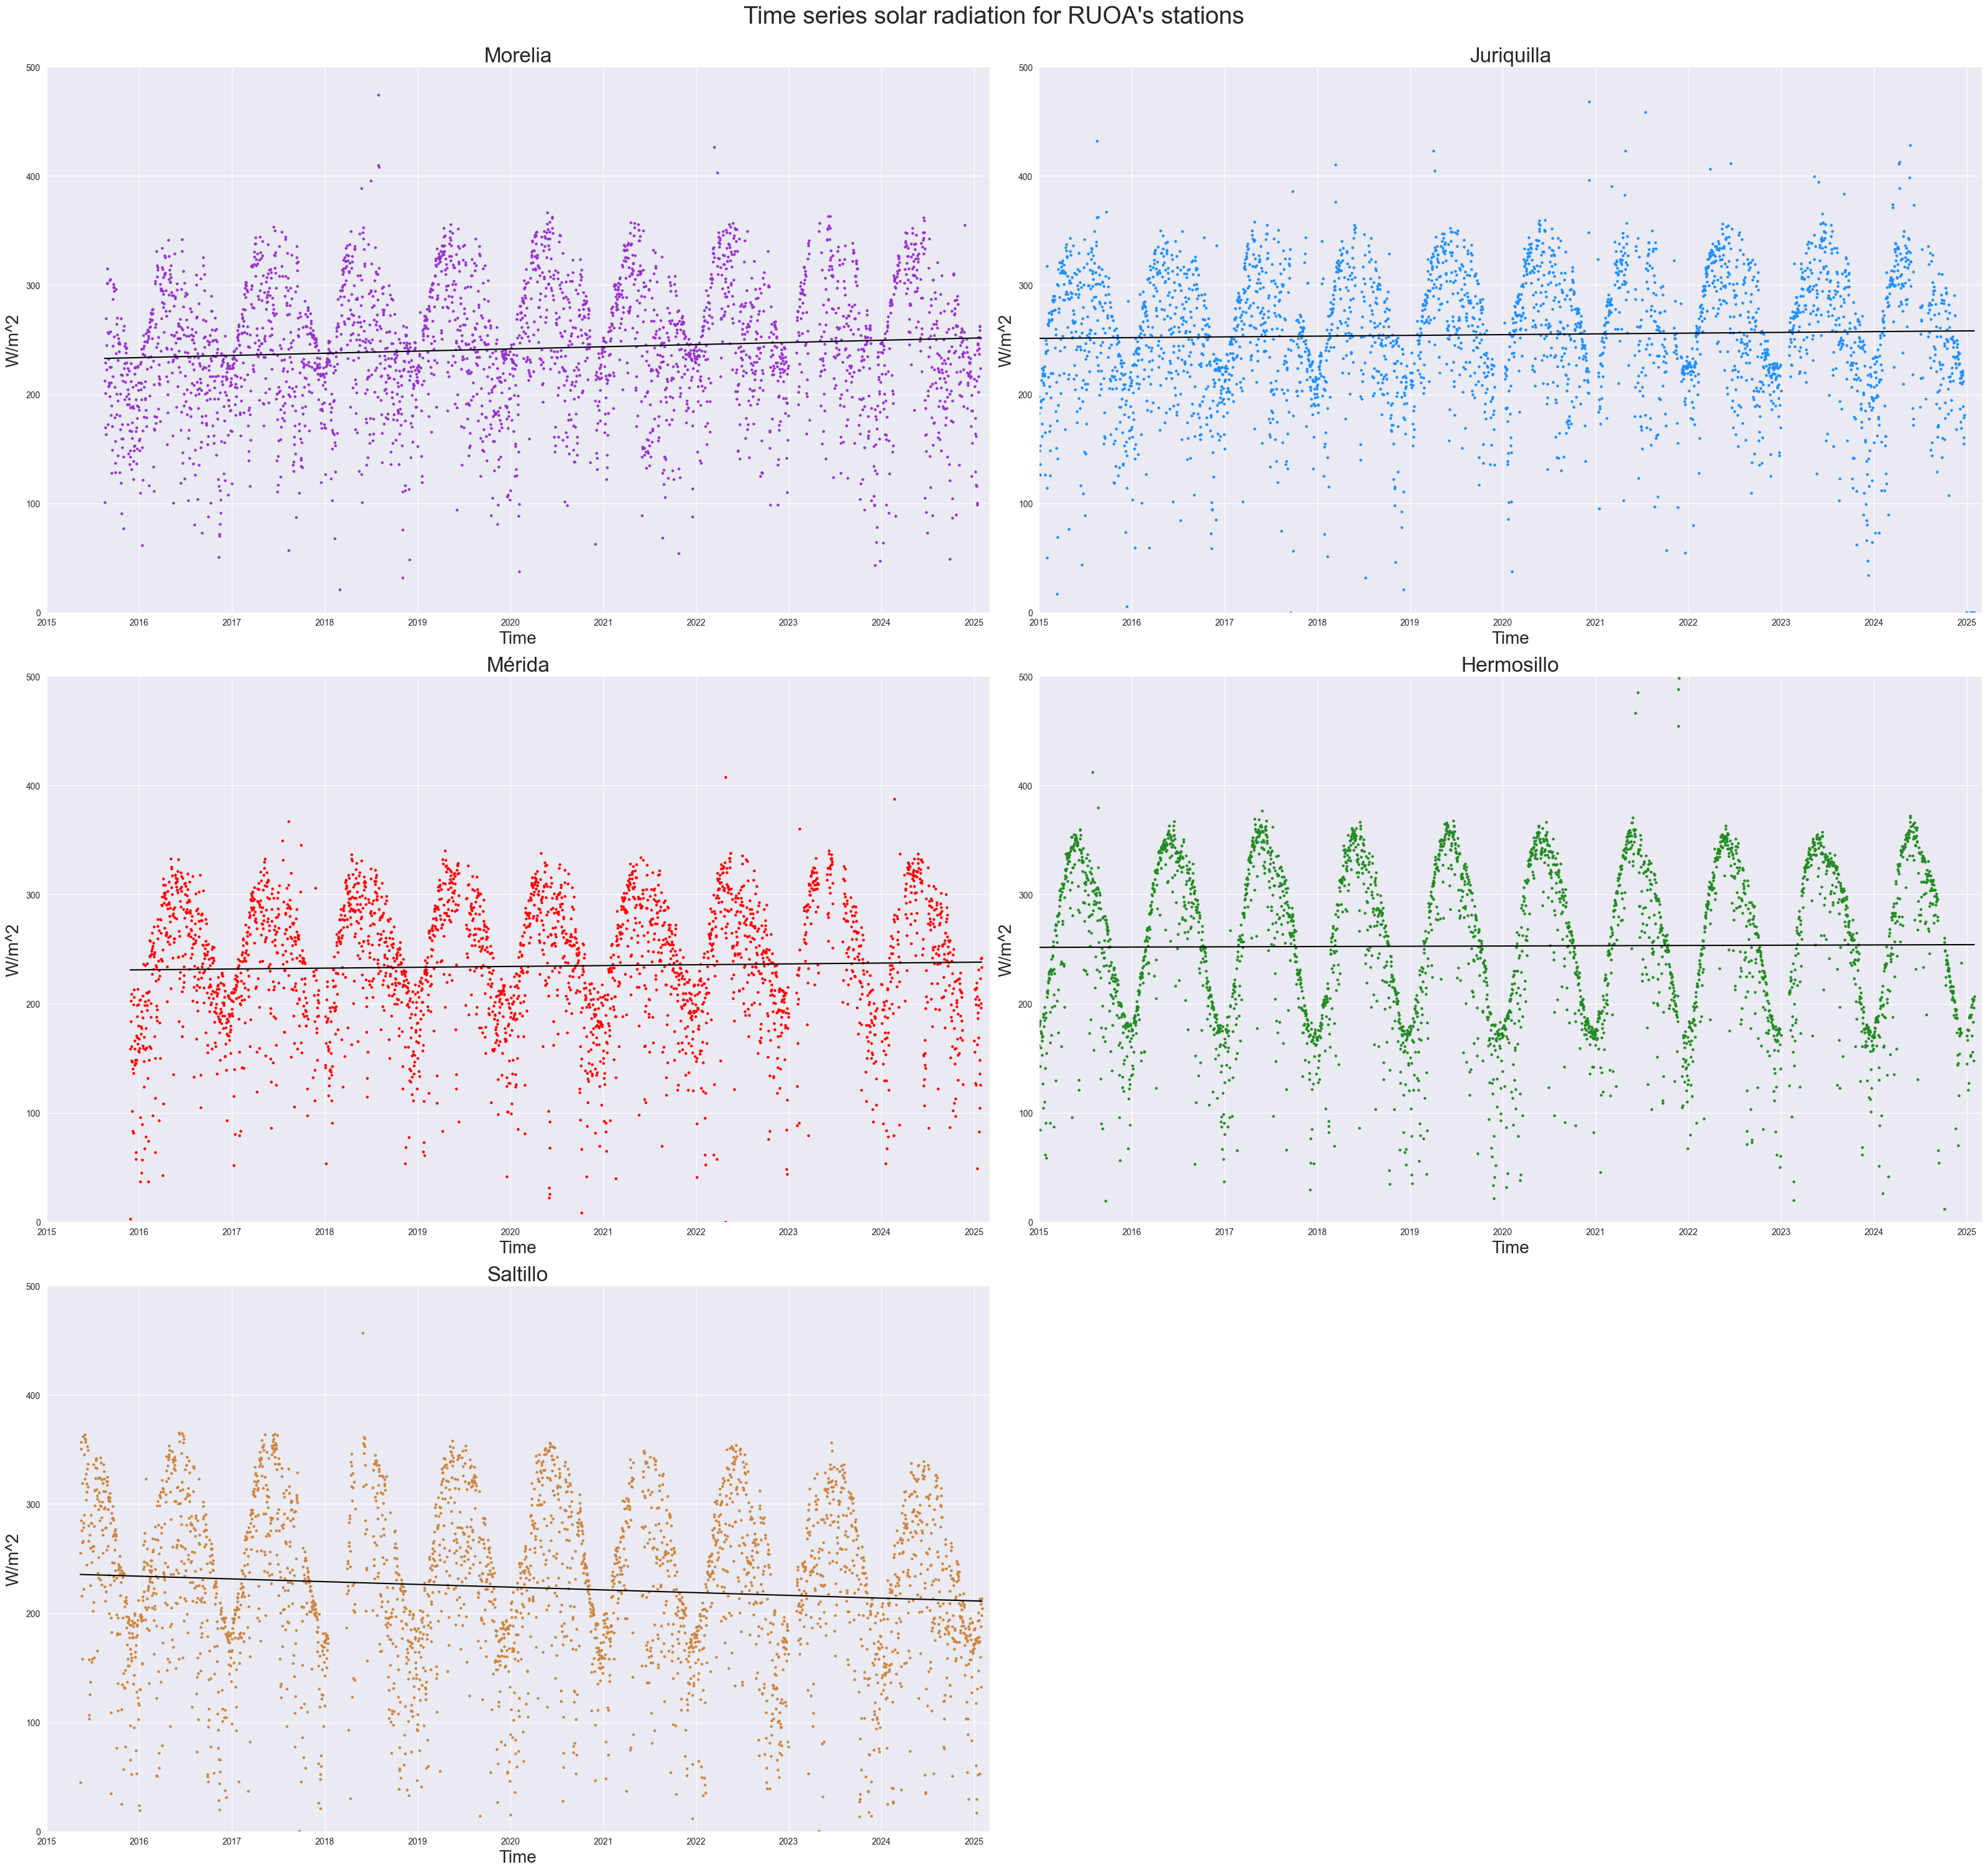

In [34]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(32, 30))

fig.suptitle("Time series solar radiation for RUOA's stations", y=1, size=28)
fig.delaxes(ax[2][1])

start_date = pd.to_datetime("2015-01-01")
end_date = pd.to_datetime("2025-03-01")

ax[0][0].scatter(x=morelia["Time"], y=morelia["Rad_Avg"], color=color["morelia"], label="Morelia", s=5)
ax[0][0].plot(morelia["Time"][maskMorelia], Y_pred_morelia, color="black")
ax[0][0].set_ylim(0, 500)
ax[0][0].set_xlim(start_date, end_date)
ax[0][0].set_title("Morelia", size=24)
ax[0][0].set_ylabel("W/m^2", size=20)
ax[0][0].set_xlabel("Time", size=20)

ax[0][1].scatter(x=juriquilla["Time"], y=juriquilla["Rad_Avg"], color=color["juriquilla"], label="Juriquilla", s=5)
ax[0][1].plot(juriquilla["Time"][maskJuriquilla], Y_pred_juriquilla, color="black")
ax[0][1].set_ylim(0, 500)
ax[0][1].set_xlim(start_date, end_date)
ax[0][1].set_title("Juriquilla", size=24)
ax[0][1].set_ylabel("W/m^2", size=20)
ax[0][1].set_xlabel("Time", size=20)

ax[1][0].scatter(x=merida["Time"], y=merida["Rad_Avg"], color=color["merida"], label="Mérida", s=5)
ax[1][0].plot(merida["Time"][maskMerida], Y_pred_merida, color="black")
ax[1][0].set_ylim(0, 500)
ax[1][0].set_xlim(start_date, end_date)
ax[1][0].set_title("Mérida", size=24)
ax[1][0].set_ylabel("W/m^2", size=20)
ax[1][0].set_xlabel("Time", size=20)

ax[1][1].scatter(x=hermosillo["Time"], y=hermosillo["Rad_Avg"], color=color["hermosillo"], label="Hermosillo", s=5)
ax[1][1].plot(hermosillo["Time"][maskHermosillo], Y_pred_hermosillo, color="black")
ax[1][1].set_ylim(0, 500)
ax[1][1].set_xlim(start_date, end_date)
ax[1][1].set_title("Hermosillo", size=24)
ax[1][1].set_ylabel("W/m^2", size=20)
ax[1][1].set_xlabel("Time", size=20)

ax[2][0].scatter(x=saltillo["Time"], y=saltillo["Rad_Avg"], color=color["saltillo"], label="Saltillo", s=5)
ax[2][0].plot(saltillo["Time"][maskSaltillo], Y_pred_saltillo, color="black")
ax[2][0].set_ylim(0, 500)
ax[2][0].set_xlim(start_date, end_date)
ax[2][0].set_title("Saltillo", size=24)
ax[2][0].set_ylabel("W/m^2", size=20)
ax[2][0].set_xlabel("Time", size=20)

plt.tight_layout()
plt.show()